In [567]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

%matplotlib inline

In [542]:
label_encoder = LabelEncoder()
OneHotEncoder  = OneHotEncoder(sparse = False)
label_Binarizer = LabelBinarizer()
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()


## GETTING THE DATA

In [543]:
car_data = pd.read_csv("car_prices.csv")

In [544]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_id               3722 non-null   object 
 1   price                3722 non-null   int64  
 2   fuel type            3721 non-null   object 
 3   gear type            3720 non-null   object 
 4   Make                 3722 non-null   object 
 5   Model                3722 non-null   object 
 6   Year of manufacture  3722 non-null   int64  
 7   Colour               3717 non-null   object 
 8   Condition            3722 non-null   object 
 9   Mileage              3663 non-null   float64
 10  Engine Size          3661 non-null   float64
 11  Selling Condition    3722 non-null   object 
 12  Bought Condition     3722 non-null   object 
 13  car                  1767 non-null   object 
 14  Trim                 879 non-null    object 
 15  Drivetrain           838 non-null    o

## Sampling a test set and no data snooping


In [545]:
train_split, test_split = train_test_split(car_data, test_size=0.2, random_state=42)

In [546]:
copy_train_split = train_split.copy()

In [547]:
copy_train_split.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2977 entries, 209 to 3174
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_id               2977 non-null   object 
 1   price                2977 non-null   int64  
 2   fuel type            2976 non-null   object 
 3   gear type            2976 non-null   object 
 4   Make                 2977 non-null   object 
 5   Model                2977 non-null   object 
 6   Year of manufacture  2977 non-null   int64  
 7   Colour               2973 non-null   object 
 8   Condition            2977 non-null   object 
 9   Mileage              2932 non-null   float64
 10  Engine Size          2930 non-null   float64
 11  Selling Condition    2977 non-null   object 
 12  Bought Condition     2977 non-null   object 
 13  car                  1409 non-null   object 
 14  Trim                 702 non-null    object 
 15  Drivetrain           669 non-null   

## EXPLORING THE DATA

In [548]:
copy_train_split.describe()

,price,Year of manufacture,Mileage,Engine Size,Seats,Number of Cylinders,Horse Power
count,2.977000e+03,2977.000000,2.932000e+03,2.930000e+03,632.000000,657.000000,602.000000
mean,4.520198e+06,2008.125630,1.965765e+05,1.127773e+04,5.299051,5.190259,210.556478
std,4.418502e+06,4.192648,1.448647e+05,1.028178e+05,0.794673,1.213000,71.225435
min,5.500000e+05,1979.000000,1.000000e+00,1.800000e+02,2.000000,4.000000,83.000000
25%,2.310000e+06,2006.000000,1.187630e+05,2.000000e+03,5.000000,4.000000,158.000000
50%,3.360000e+06,2008.000000,1.767930e+05,2.500000e+03,5.000000,6.000000,207.000000
75%,5.000000e+06,2011.000000,2.464135e+05,3.500000e+03,5.000000,6.000000,268.000000
max,6.240000e+07,2022.000000,2.456318e+06,3.500000e+06,8.000000,8.000000,585.000000


## Histogram of continous data

In [549]:
q = copy_train_split['Mileage'].quantile(0.99)
copy_train_split = copy_train_split[(copy_train_split['Mileage']) < q]

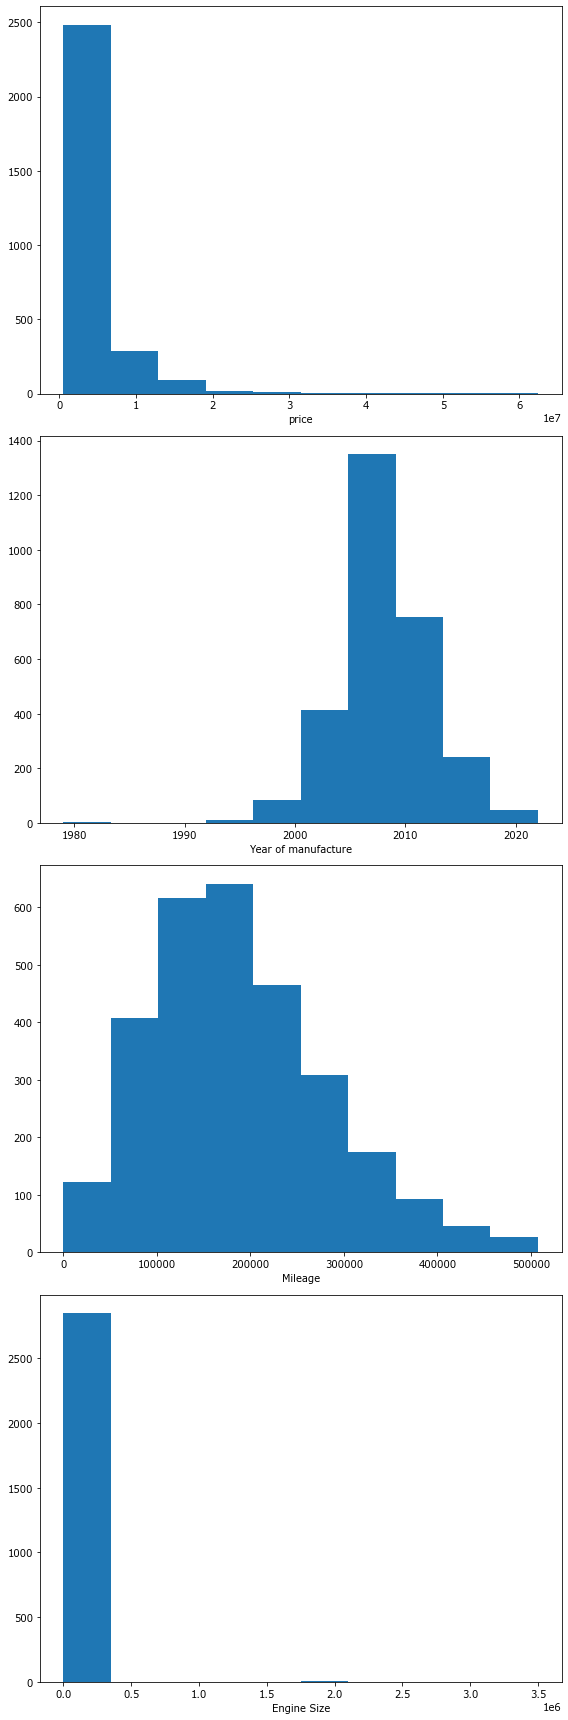

In [550]:
columns = ["price","Year of manufacture", "Mileage", "Engine Size"]

fig, axes = plt.subplots(nrows= len(columns), ncols=1, figsize= (8, 6*len(columns)))

for i, column in enumerate(columns):
    ax = axes[i]
    ax.hist(copy_train_split[column])
    ax.set_xlabel(columns[i])
plt.tight_layout()



# Display the plot
plt.show()  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


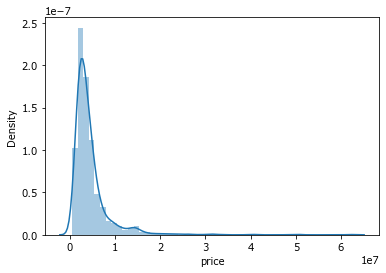

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


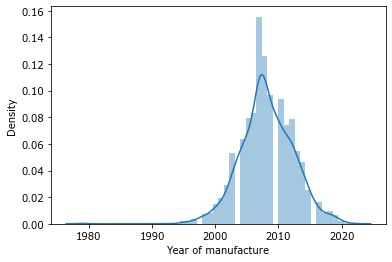

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


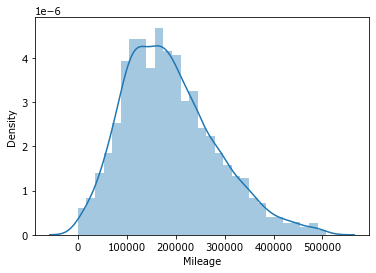

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


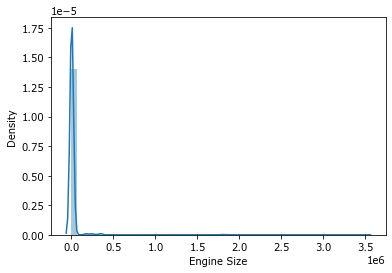

In [551]:
columns = ["price","Year of manufacture", "Mileage", "Engine Size"]

for column in columns:
    sns.distplot(copy_train_split[column])
    plt.show()  


# Display the plot


### LOG TRANSFORMATION HISTOGRAM


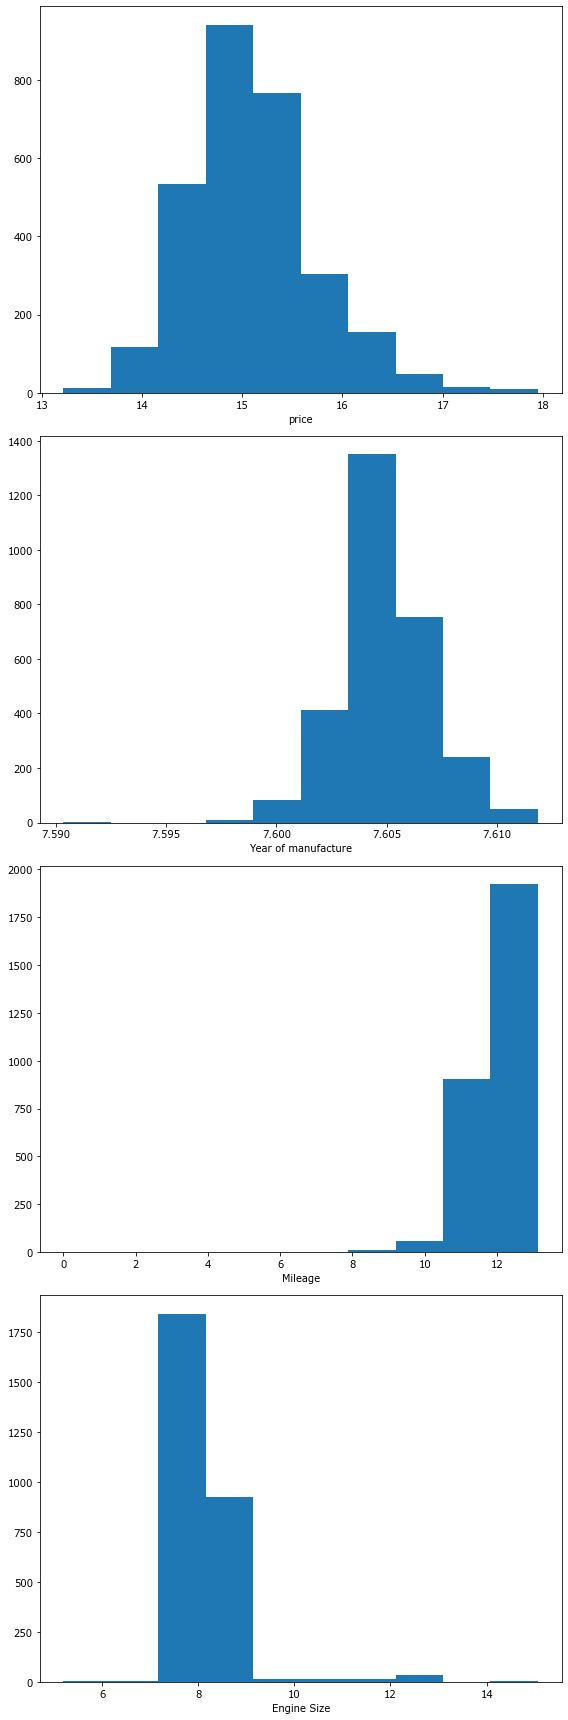

In [552]:
columns = ["price","Year of manufacture", "Mileage", "Engine Size"]

fig, axes = plt.subplots(nrows= len(columns), ncols=1, figsize= (8, 6*len(columns)))

for i, column in enumerate(columns):
    ax = axes[i]
    ax.hist(np.log(copy_train_split[column]))
    ax.set_xlabel(columns[i])
plt.tight_layout()



# Display the plot
plt.show()  

###### car-id: this is the id of the car, which i feel wont describebe anything about the car so needs to be removed \n
###### price- That is our target. it does not have any null value and it is an integer
###### fuel_type: It has one missing vlue, which would be removed
###### gear_type: It has one missing vlue, and anobject
###### color- it has 4 missing values, put in the mode values in each one
###### mileage- it has 45 missing values, and it is a flot, so we can fill in with median
###### Engine size- als have 45+ missing values. it can be filled with median
###### car: has a lot of missing value and it is an object
###### trim, drivetrain,seats,number_of_cylinder,horse power, registered city all have a lot of missing values
###### i would remove from car to registered city


###### Log of price transformation
######  Log all numerical data except from mileage

###### Stochastic noise is often not unavoidable. All you have to do is build robost models, and you can use sross validation technique to know if your data is suspectible to noise.   Robust models like decision tree can reduce outliers

###### removing outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


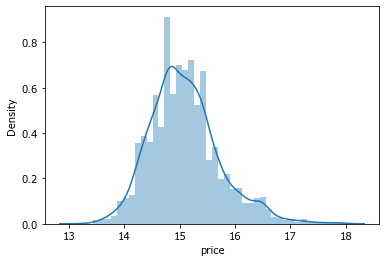

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


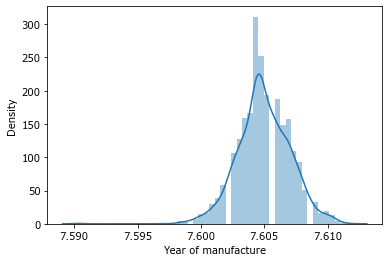

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


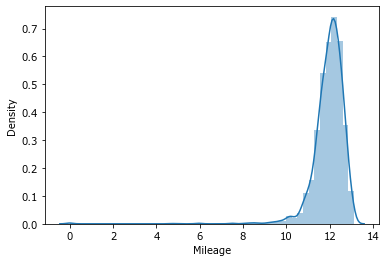

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


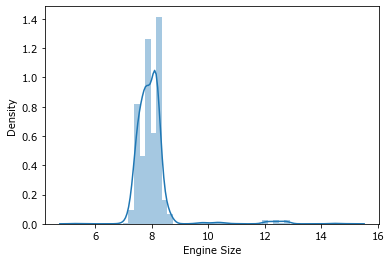

In [553]:
columns = ["price","Year of manufacture", "Mileage", "Engine Size"]

for column in columns:
    sns.distplot(np.log(copy_train_split[column]))
    plt.show()  


In [554]:
## CORELLATION
numerical_columns = copy_train_split.select_dtypes(include = ['int64', 'float64'])
correlation_columns = numerical_columns.corr()
print(correlation_columns)

                        price  Year of manufacture   Mileage  Engine Size  \
price                1.000000             0.546420 -0.301057    -0.005539   
Year of manufacture  0.546420             1.000000 -0.428033    -0.004121   
Mileage             -0.301057            -0.428033  1.000000    -0.011172   
Engine Size         -0.005539            -0.004121 -0.011172     1.000000   
Seats                0.064754            -0.058801  0.019940     0.325454   
Number of Cylinders  0.198743            -0.124008  0.025063     0.843623   
Horse Power          0.405427             0.190876 -0.101612     0.836362   

                        Seats  Number of Cylinders  Horse Power  
price                0.064754             0.198743     0.405427  
Year of manufacture -0.058801            -0.124008     0.190876  
Mileage              0.019940             0.025063    -0.101612  
Engine Size          0.325454             0.843623     0.836362  
Seats                1.000000             0.355219   

In [555]:
## CORELLATION WITH LOG
numerical_columns = copy_train_split.select_dtypes(include = ['int64', 'float64'])
correlation_columns = np.log(numerical_columns).corr()
print(correlation_columns)

                        price  Year of manufacture   Mileage  Engine Size  \
price                1.000000             0.689701 -0.280323     0.113090   
Year of manufacture  0.689701             1.000000 -0.357178    -0.021647   
Mileage             -0.280323            -0.357178  1.000000    -0.015373   
Engine Size          0.113090            -0.021647 -0.015373     1.000000   
Seats                0.057709            -0.061620  0.005775     0.314577   
Number of Cylinders  0.208156            -0.130687  0.045214     0.829019   
Horse Power          0.426626             0.200911 -0.078315     0.851749   

                        Seats  Number of Cylinders  Horse Power  
price                0.057709             0.208156     0.426626  
Year of manufacture -0.061620            -0.130687     0.200911  
Mileage              0.005775             0.045214    -0.078315  
Engine Size          0.314577             0.829019     0.851749  
Seats                1.000000             0.345761   

In [556]:
## remove engine size
## remove seats
## Add power/cylinder
## Log all numerical values

### PREPARING THE DATA

In [557]:

def fill_in_object_value(column_list, data):
    for column_name in column_list:
        try:
            mode = data[column_name].mode()[0]
            data[column_name].fillna(mode, inplace = True)
        except IndexError:
           continue
    return data
def fill_in_numeric_value(column_list, data):
    for column_name in column_list:

        try:
            mean_value = data[column_name].mean()
            data[column_name].fillna(mean_value, inplace=True)  
        except IndexError:
            continue
    return data
def remove_column(data, column_list=[]):
    for column in column_list:
        try:
            data.drop(column, axis=1, inplace =True)
        except KeyError:
            continue
    return data
        
def decompose_object(column_name, data):

    data[column_name] = data[column_name].astype(str)

    label_binarizer = LabelBinarizer()
    one_hot_encoded = label_binarizer.fit_transform(data[column_name])

    encoded_columns = [f'encoded_{class_}' for class_ in label_binarizer.classes_]
    df_encoded = pd.DataFrame(one_hot_encoded, columns=encoded_columns)

    df_final = pd.concat([data, df_encoded], axis=1)

    return df_final

def aggregate_features(data ):
    data["power/cylinder"] = data["Horse Power"]/ data["Number of Cylinders"]
    return data

def scale_numeric(data, column_name):
    scaled_data = standard_scaler.fit_transform([data[column_name]])
    return scaled_data

def log_feature(column_list, data):
    for column in column_list:
        data[column] = np.log(data[column])
    return data


def prepare_scale_binarizer (numerical_columns, object_columns, data):
    scaled_column = minmax_scaler.fit_transform(numerical_columns)
    scaled_numeric_df = pd.DataFrame(scaled_column, columns = numerical_columns.columns)


    binarized_labels_dfs = []
    for col in object_columns.columns:
        binarized_label = label_binarizer.fit_transform(object_columns[col])
        binarized_labels_df = pd.DataFrame(binarized_label, columns=label_binarizer.classes_)
        binarized_labels_dfs.append(binarized_labels_df)

    concatenated_dataframe = pd.concat([scaled_numeric_df] + binarized_labels_dfs, axis=1)
    return concatenated_dataframe
    


In [558]:
column_to_log = ['price']
copy_train_data = log_feature(column_to_log, copy_train_split)

missing_columns_object = ["fuel type", 'gear type', 'Colour', ]
copy_train_data = fill_in_object_value(missing_columns_object, copy_train_data)


missing_column_numerical = ["Mileage", "Horse Power", "Number of Cylinders"]
copy_train_data = fill_in_numeric_value(missing_column_numerical, copy_train_data)

column_to_drop = ['car_id', 'car', 'Trim','Drivetrain','Seats','Registered city','Engine Size','cylinder/pw]']
copy_train_data = remove_column(copy_train_data, column_to_drop)

copy_train_data = aggregate_features(copy_train_data)

numerical_columns = df.select_dtypes(include= ['int64', 'float64'])
object_columns = df.select_dtypes(exclude=['int64', 'float64'])
copy_train_data = prepare_scale_binarizer(numerical_columns, object_columns, copy_train_data)


In [559]:
copy_train_data.isna().any()

price                  False
Year of manufacture    False
Mileage                False
Number of Cylinders    False
Horse Power            False
                       ...  
Imported               False
Registered             False
Brand new              False
Imported               False
Registered             False
Length: 384, dtype: bool

### MODEL SELECTIIOIN

In [579]:
first_model_data = copy_train_data.copy()
target = first_model_data["price"]
features = first_model_data.drop('price', axis =1)
